# Comparison of Bag of Words and TF-IDF

In this section, we used bag of words model and TF-IDF algorithm to extract features of tweets.From the results, these two simple ways are generally effective after training.
According to our results, TF-IDF results slightly better. Therefore, we adopted this method to extract features and conduct subsequent experiments which is in 'Three_Model_Comparison.ipynb',

# Import Basic Library

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load Dataset and Display

In [3]:
train  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/training_kaggle_1.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/testing_kaggle_1.csv')

print(train)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


# Data Cleaning

### 1. Remove some useless symbols unique to Twitter


In [5]:
clean_data = train.append(test, ignore_index=True)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

clean_data['tidy_tweet'] = np.vectorize(remove_pattern)(clean_data['tweet'], "@[\w]*")

### 2. Remove punctuation, numbers and special characters

In [6]:
clean_data['tidy_tweet'] = clean_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-6-6c4a69912318>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_data['tidy_tweet'] = clean_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


### 3. Delete some meaningless short words

In [7]:
clean_data['tidy_tweet'] = clean_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### 4. Check the result

In [8]:
print(clean_data)

          id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                              tidy_tweet  
0      when father dysfunctional selfish drags kids 

# Label All Cleaned Tweets in the Dataset

In [9]:
labeled_tweet = clean_data['tidy_tweet'].apply(lambda x: x.split())
print(labeled_tweet)

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: tidy_tweet, Length: 49159, dtype: object


# Extracting Common Forms of Words based on English Grammar

In [10]:
stemmer = PorterStemmer()

tokenized_tweet = labeled_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

clean_data['tidy_tweet'] = tokenized_tweet

print(clean_data)

          id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                              tidy_tweet  
0      when father dysfunct selfish drag kid into dy

# Generate Word Cloud

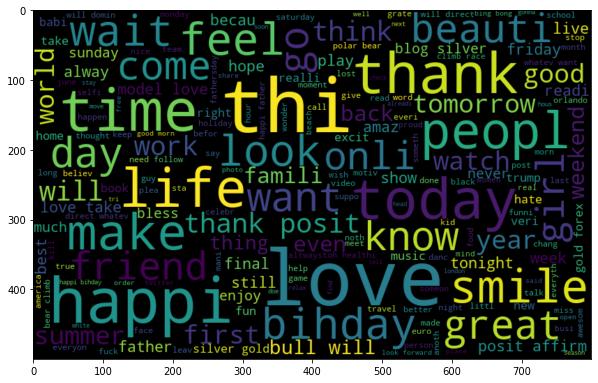

In [ ]:
all_words = ' '.join([text for text in clean_data['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

# Features Extraction

### 1. Bag of Words Features

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(clean_data['tidy_tweet'])

### 2. TF-IDF Features

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(clean_data['tidy_tweet'])

# Model Training and Testing

### 1. Bag of Words

In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

print("Result for Bag of Words Model is:")
f1_score(yvalid, prediction_int)

Result for Bag of Words Model is:


0.5303408146300915

### 2. TF-IDF

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print("Result for TF-IDF Model is:")
f1_score(yvalid, prediction_int)

Result for TF-IDF Model is:


0.5451327433628319